In [137]:
try:
    %load_ext google.colab.data_table
except Exception as e:
    pass
import json
import pandas as pd
from matplotlib import pyplot as plt
from time import sleep
try:
    %matplotlib inline
except Exception as e:
    pass


In [138]:
try:
    from google.colab import files
    uploaded = files.upload()
    data:dict = json.loads(uploaded['data-trunc.json'])
except Exception as e:
    import util
    with open('./data.json') as fp:
        # 500ms~
        data:dict = util.partial_json(fp,objs=26)

In [139]:
data

{'1577836803078': {'assetA': {'ask': 7189, 'bid': 7188.89},
  'assetB': {'ask': 7170.25, 'bid': 7169.5}},
 '1577836806371': {'assetA': {'ask': 7190.09, 'bid': 7190.05},
  'assetB': {'ask': 7170.25, 'bid': 7169.5}},
 '1577836806459': {'assetA': {'ask': 7190.09, 'bid': 7190.05},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836806474': {'assetA': {'ask': 7190.43, 'bid': 7190.05},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836806575': {'assetA': {'ask': 7190.39, 'bid': 7190.05},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807242': {'assetA': {'ask': 7190.33, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807344': {'assetA': {'ask': 7190.25, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807444': {'assetA': {'ask': 7190.21, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807545': {'assetA': {'ask': 7190.12, 'bid': 7189.92},
  'assetB': {'ask': 7170.5, 'bid': 7169.5}},
 '1577836807649': {'assetA': 

In [140]:
%%script false --no-raise-error

try:
    import util
    get_chunks = util.get_chunks
    simulate_stream = util.simulate_stream
except:
    def get_chunks(data, chunksize=10000, chunk_count=None):
        chunks = []
        chunk = dict()
        count = 0
        for i, (key, value) in enumerate(data.items()):
            if i and i % chunksize == 0:
                chunks.append(chunk)
                count += 1
                chunk = dict()
                if chunk_count and chunk_count == count:
                    return chunks
            chunk[key] = value
        return chunks



    def simulate_stream(data):
        """Yields a DataFrame"""
        keys = list(data.keys())
        for i, (key, value) in enumerate(data.items()):
            try:
                yield pd.DataFrame({key: value})
                nextkey = int(keys[i + 1])
                diff_sec = (nextkey - int(key)) / 1000
                sleep(diff_sec)
            except IndexError:
                # end of file
                return

In [141]:
%%script false --no-raise-error
chunk = get_chunks(data, chunksize=100, chunk_count=1)[0]

In [142]:
%%script false --no-raise-error
chunkiter = iter(chunk)
key0 = int(next(chunkiter))
timestamps = []
assetA_asks = []
assetB_asks = []
assetA_bids = []
assetB_bids = []
for i, (k, v) in enumerate(chunk.items()):
    assetA_ask = v['assetA']['ask']
    assetB_ask = v['assetB']['ask']
    assetA_bid = v['assetA']['bid']
    assetB_bid = v['assetB']['bid']
    norm_key = int(k) - key0
    timestamps.append(norm_key)
    assetA_asks.append(assetA_ask)
    assetB_asks.append(assetB_ask)
    assetA_bids.append(assetA_bid)
    assetB_bids.append(assetB_bid)

In [143]:
%%script false --no-raise-error
# A vs B | ASKS
plt.figure(figsize=(20,10))
plt.plot(timestamps, assetA_asks,':r',
         timestamps, assetB_asks, ':g')
plt.title('A vs B | ASKS')
plt.xlabel('Time')
plt.ylabel('Price')

In [144]:
%%script false --no-raise-error
# A vs B | BIDS
plt.figure(figsize=(20,10))
plt.plot(timestamps, assetA_bids,'--r',
         timestamps, assetB_bids, '--g')
plt.title('A vs B | BIDS')
plt.xlabel('Time')
plt.ylabel('Price')

In [145]:
%%script false --no-raise-error
# A | Asks vs Bids
plt.figure(figsize=(20,10))
plt.plot(timestamps, assetA_asks, ':r',
         timestamps, assetA_bids, '--r')
plt.title('A | Asks vs Bids')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [146]:
%%script false --no-raise-error

# B | Asks vs Bids
plt.figure(figsize=(20,10))
plt.plot(timestamps, assetB_asks, ':g',
         timestamps, assetB_bids, '--g')
plt.title('B | Asks vs Bids')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()



In [147]:
# df = pd.read_json('./data-trunc.json', orient='index')
df = pd.DataFrame.from_dict(data,orient='index')

df

,assetA,assetB
1577836803078,"{'ask': 7189, 'bid': 7188.89}","{'ask': 7170.25, 'bid': 7169.5}"
1577836806371,"{'ask': 7190.09, 'bid': 7190.05}","{'ask': 7170.25, 'bid': 7169.5}"
1577836806459,"{'ask': 7190.09, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
1577836806474,"{'ask': 7190.43, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
1577836806575,"{'ask': 7190.39, 'bid': 7190.05}","{'ask': 7170.5, 'bid': 7169.5}"
1577836807242,"{'ask': 7190.33, 'bid': 7189.92}","{'ask': 7170.5, 'bid': 7169.5}"
1577836807344,"{'ask': 7190.25, 'bid': 7189.92}","{'ask': 7170.5, 'bid': 7169.5}"
1577836807444,"{'ask': 7190.21, 'bid': 7189.92}","{'ask': 7170.5, 'bid': 7169.5}"
1577836807545,"{'ask': 7190.12, 'bid': 7189.92}","{'ask': 7170.5, 'bid': 7169.5}"
1577836807649,"{'ask': 7190.01, 'bid': 7189.92}","{'ask': 7170.5, 'bid': 7169.5}"


In [148]:
def asks(state):
    ask_ = state['ask']
    return ask_
def bids(state):
    bid_ = state['bid']
    return bid_

In [225]:
def plot(obj, title=None):
    plt.figure(figsize=(15,7))
    plt.plot(obj)
    if title:
        plt.title(title, color='white')
    axes = plt.axes()
    axes.patch.set_facecolor('black')
    plt.xticks(rotation=45,color='white')
    plt.yticks(color='white')
    plt.show()

def plotmany(x, objs, title=None):
    plt.figure(figsize=(15,7))
    if title:
        plt.title(title, color='white')
    for obj, kwargs in objs:
        plt.plot(x, obj, **kwargs)
    plt.legend(loc='upper left')
    axes = plt.axes()
    axes.patch.set_facecolor('black')
    plt.xticks(rotation=45,color='white')
    plt.yticks(color='white')
    plt.show()

In [220]:
assetA = df.assetA.apply([asks, bids])

,asks,bids
1577836803078,7189.00,7188.89
1577836806371,7190.09,7190.05
1577836806459,7190.09,7190.05
1577836806474,7190.43,7190.05
1577836806575,7190.39,7190.05
1577836807242,7190.33,7189.92
1577836807344,7190.25,7189.92
1577836807444,7190.21,7189.92
1577836807545,7190.12,7189.92
1577836807649,7190.01,7189.92


In [150]:
assetB = df.assetB.apply([asks, bids])

,asks,bids
1577836803078,7170.25,7169.5
1577836806371,7170.25,7169.5
1577836806459,7170.50,7169.5
1577836806474,7170.50,7169.5
1577836806575,7170.50,7169.5
1577836807242,7170.50,7169.5
1577836807344,7170.50,7169.5
1577836807444,7170.50,7169.5
1577836807545,7170.50,7169.5
1577836807649,7170.50,7169.5


In [ ]:
# short term exponential moving average
short_ema = assetA.ewm(span=12,adjust=False).mean()

<ipython-input-209-83c3f164e10a>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


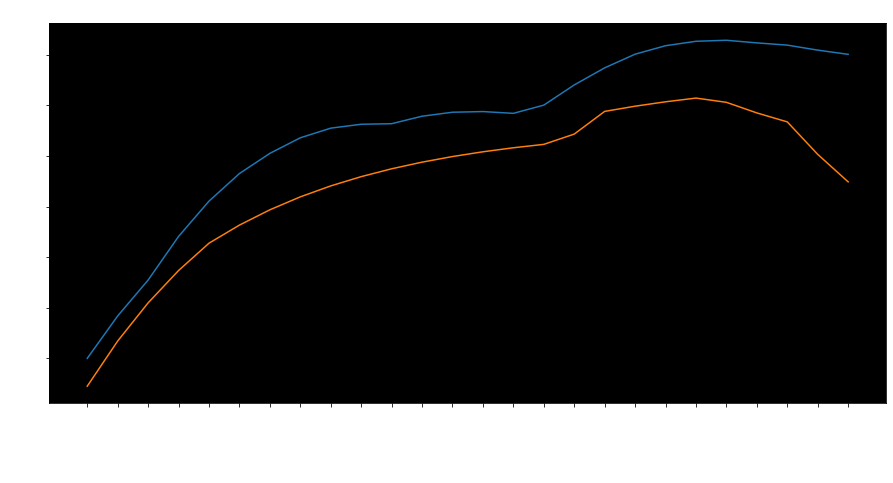

In [212]:
plot(short_ema, 'Short Moving Average')

<ipython-input-209-83c3f164e10a>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


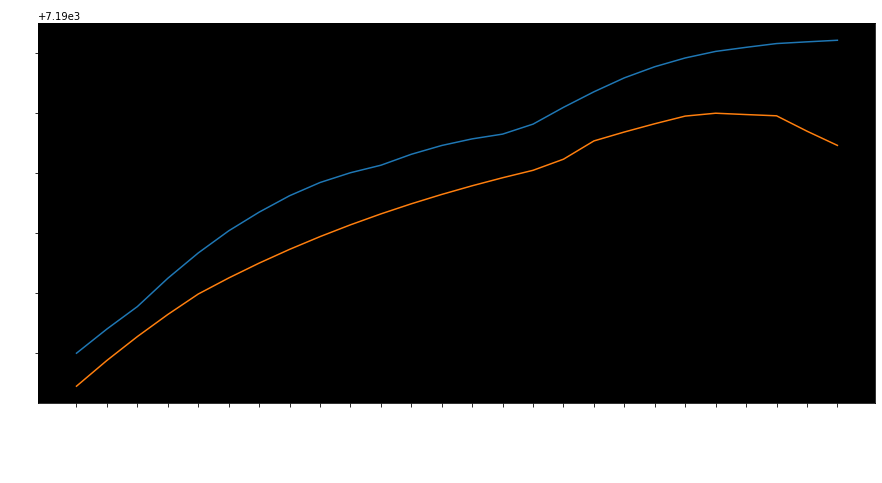

In [210]:
# long term exponential moving average
long_ema = assetA.ewm(span=26,adjust=False).mean()
plot(long_ema,'Long Moving Average')

# getmeths(axes.patch, only='regular')

<ipython-input-209-83c3f164e10a>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


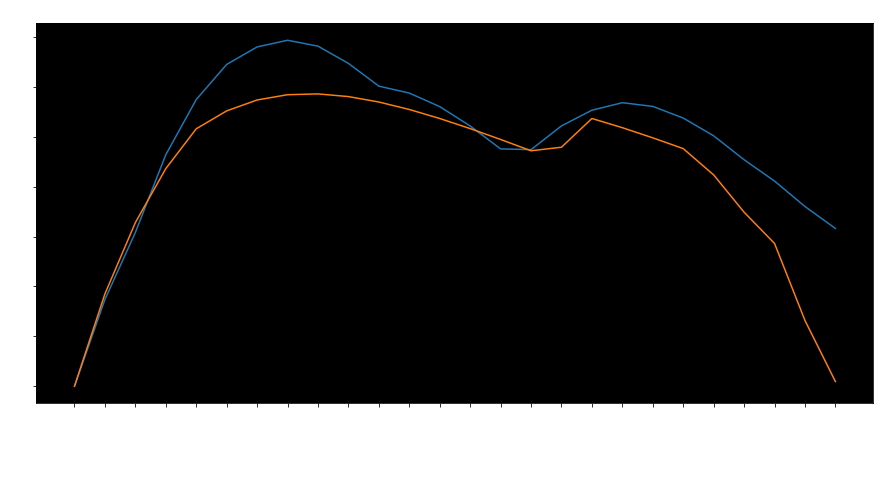

In [213]:
#MACD line
macd = short_ema - long_ema
plot(macd, title = 'MACD')

<ipython-input-209-83c3f164e10a>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


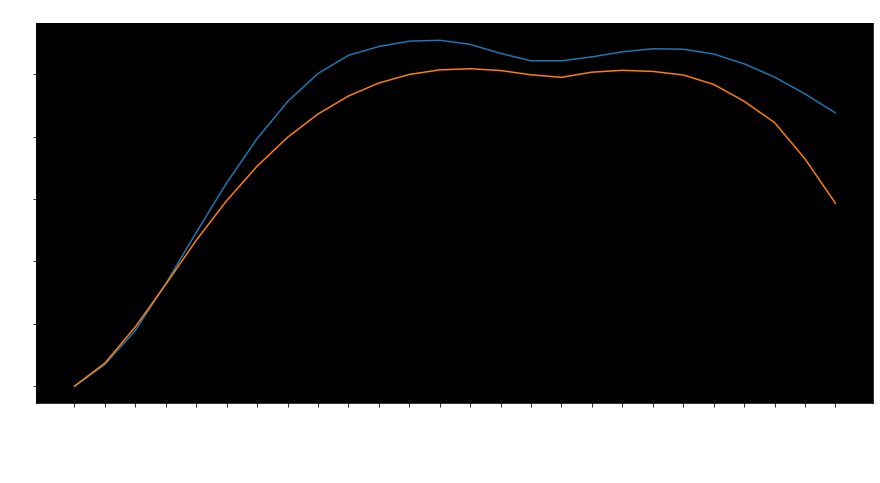

In [214]:
# signal line
signal = macd.ewm(span=9, adjust=False).mean()
plot(signal, title = 'Signal')

<ipython-input-225-5f23de08327d>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


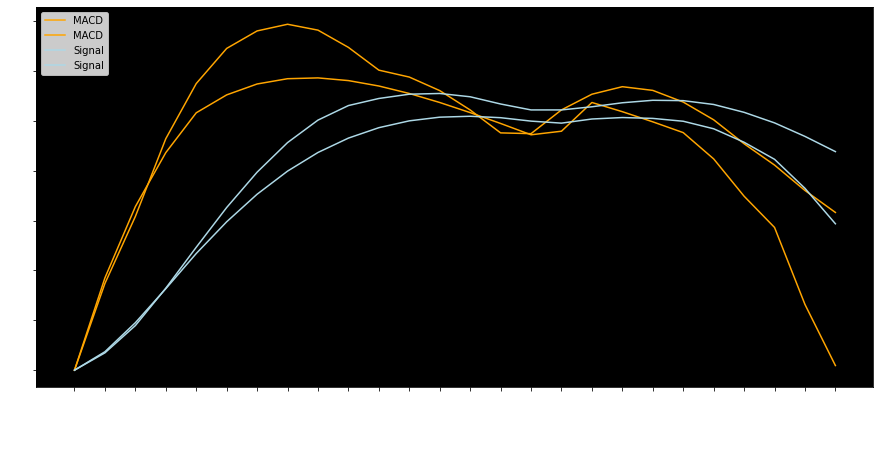

In [233]:
# plot
plotmany(df.index,[
    (macd, dict(label = 'MACD', color='orange')),
    (signal, dict(label = 'Signal',color='lightblue'))
    ])

